# Random 2D data
These are pseudo-random maps that represent a scalar field which varies smoothly over a 2D world. There are a handful of different ways to generate them, with different properties. An important part of the design of these maps is the seed can be set to ensure the map is deterministic. But this does not interfere with the randomness of the rest of your system. This is demonstrated by running the same seed twice and showing that the map and sampled values are the same, but a random number generator still works non-deterministically.

In [12]:
# Import the required maps
from ipp_toolkit.data.random_2d import (
    RandomGaussian2D,
    RandomGMM2D,
    RandomGaussianProcess2D,
)
import numpy as np

WORLD_SIZE = (20, 20)
SAMPLE_POINT = (10, 10)
# If the random seed is set to None, the maps will be non-deterministic
# If it is set to an int, it will be deterministic
RANDOM_SEED = None
VIS_RESOLUTION = 0.1

### Gaussian Mixture Model
Here, a number of random locations are sampled within the bounds of the grid. Then, a Gaussian Mixture Model is fit to these points. The density of the GMM prediction is scaled so the max is 1 and used as the map.

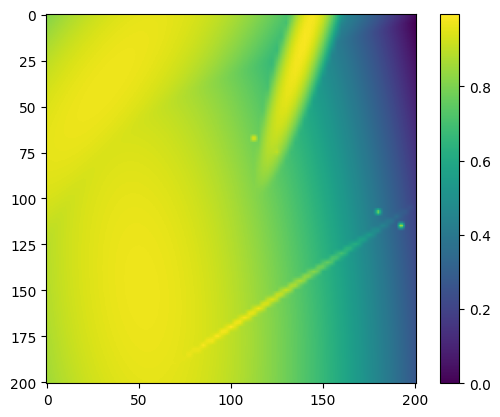

Sampled value 0.8663883403439391
Checking that randomness is still random 0.8770202076424504


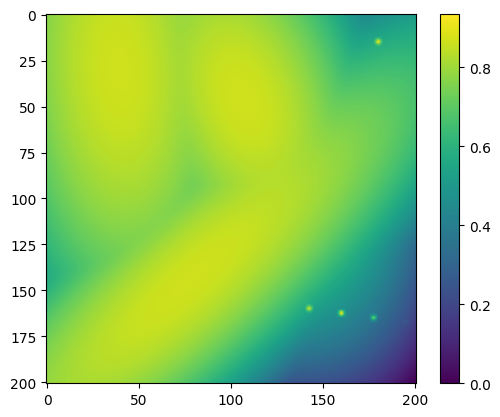

Sampled value 0.8179150398700987
Checking that randomness is still random 0.00229008165507838


In [18]:
for _ in range(2):
    gm = RandomGMM2D(
        world_size=WORLD_SIZE, n_points=15, n_components=5, random_seed=RANDOM_SEED
    )
    gm.show(VIS_RESOLUTION)
    print(f"Sampled value {gm.sample(SAMPLE_POINT)}")
    print(f"Checking that randomness is still random {np.random.rand()}")


### Gaussian Process
Here, points are randomly sampled from within the world and each one is given a value between 0 and 1. Then, a gaussian process is fit to these points, and the map is the prediction of the mean from the GP.

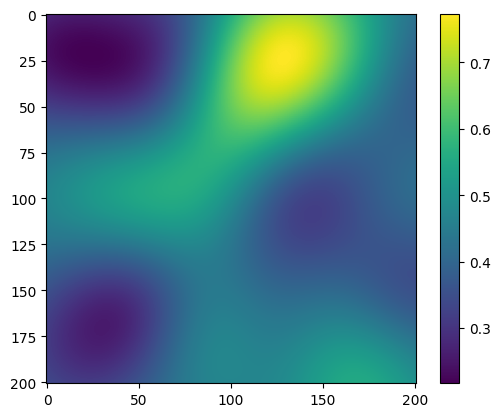

Sampled value 0.49011728167533875
Checking that randomness is still random 0.49149556711239994


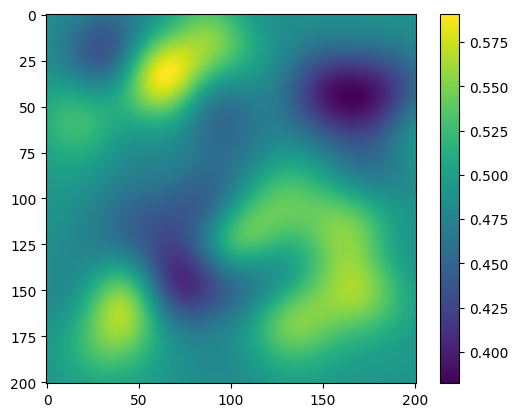

Sampled value 0.48176896572113037
Checking that randomness is still random 0.3113958667357981


In [14]:
for _ in range(2):
    gp = RandomGaussianProcess2D(world_size=WORLD_SIZE, random_seed=RANDOM_SEED)
    gp.show(VIS_RESOLUTION)
    print(f"Sampled value {gp.sample(SAMPLE_POINT)}")
    print(f"Checking that randomness is still random {np.random.rand()}")


### Random Gaussian PDFs
Here, the world is created as the sum of a 2D Gaussian PDFs. Each one is created with a random mean within the bounds of the world, and a random axis-aligned variance within a given range. Then the PDFs for each one are summed and normalized so the maximum value is 1.

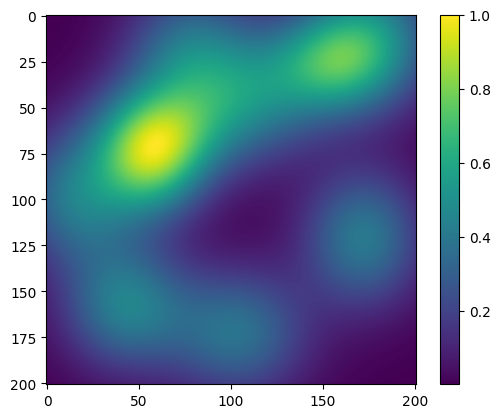

Sampled value 0.09923068569372906
Checking that randomness is still random 0.9538666084361195


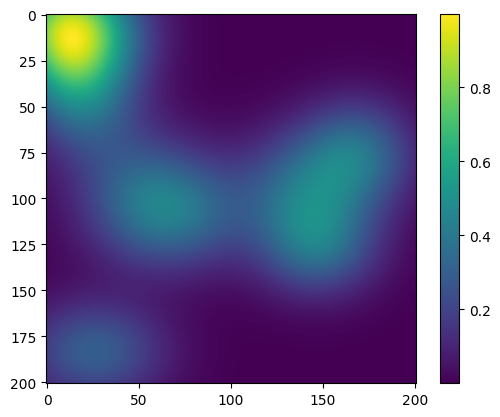

Sampled value 0.28436099658395103
Checking that randomness is still random 0.8539791407481226


In [15]:
for _ in range(2):
    gb = RandomGaussian2D(
        world_size=WORLD_SIZE, blob_size_range=(3, 7), n_blobs=10, random_seed=RANDOM_SEED
    )
    gb.show(VIS_RESOLUTION)
    print(f"Sampled value {gb.sample(SAMPLE_POINT)}")
    print(f"Checking that randomness is still random {np.random.rand()}")
